In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator
import seaborn as sns

In [36]:
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/customer_classification_data.csv"
df = pd.read_csv(url)
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,66161.01279,57,Bachelor,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693
1,78639.20248,60,High School,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358
2,70207.25321,46,High School,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993
3,65866.23872,42,High School,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473
4,56774.10995,36,Bachelor,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Income                 500 non-null    float64
 1   Age                    500 non-null    int64  
 2   Education              500 non-null    object 
 3   Credit_Score           500 non-null    int64  
 4   Years_with_Bank        500 non-null    int64  
 5   Transaction_Count      500 non-null    int64  
 6   Balance                500 non-null    float64
 7   Loan_Approval_Amount   500 non-null    float64
 8   Credit_Card_Limit      500 non-null    float64
 9   Purchase_Frequency     500 non-null    float64
 10  Customer_Satisfaction  500 non-null    int64  
 11  Online_Activity        500 non-null    float64
dtypes: float64(6), int64(5), object(1)
memory usage: 47.0+ KB


In [38]:
df.describe()

,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,62244.823110,40.010000,564.992000,10.806000,48.486000,5062.825191,25395.518396,10609.972452,0.512753,2.564000,0.494516
std,21881.731581,13.051229,159.206663,5.151061,28.742339,2926.414765,14257.083307,5572.250431,0.282915,1.101058,0.294468
min,25352.160710,18.000000,300.000000,1.000000,1.000000,44.900440,1087.318821,1017.345471,0.000813,1.000000,0.001320
25%,43586.942127,29.000000,426.000000,7.000000,25.000000,2563.861164,13254.375542,5788.708258,0.272196,2.000000,0.239926
50%,61513.145375,39.000000,562.000000,11.000000,48.000000,4962.940262,25523.286385,10716.457885,0.531370,3.000000,0.485326
75%,79805.933200,51.000000,692.000000,15.000000,72.000000,7575.192218,38359.706343,15530.730127,0.763411,4.000000,0.759197
max,99913.525490,64.000000,849.000000,19.000000,99.000000,9984.440444,49971.895230,19968.520560,0.993942,4.000000,0.999897


In [39]:
from sklearn.preprocessing import OrdinalEncoder
import pprint

df_encoded = df.copy()

ordinal_cols = ['Education']

ordinal_encoder = OrdinalEncoder(
    categories=[['High School','Bachelor','Master','PhD']],
    handle_unknown='use_encoded_value',
    unknown_value=-1
)

df_encoded[ordinal_cols] = ordinal_encoder.fit_transform(df_encoded[ordinal_cols])

encode_dict = {}

for col, cats in zip(ordinal_cols, ordinal_encoder.categories_):
    encode_dict[col] = {category: i for i, category in enumerate(cats)}

pprint.pprint(encode_dict)


{'Education': {'Bachelor': 1, 'High School': 0, 'Master': 2, 'PhD': 3}}


# EDA

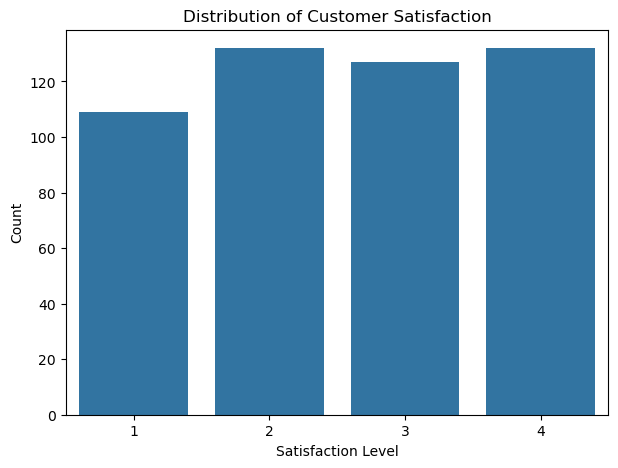

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
sns.countplot(x='Customer_Satisfaction', data=df)
plt.title("Distribution of Customer Satisfaction")
plt.xlabel("Satisfaction Level")
plt.ylabel("Count")
plt.show()

**Insight**
barplot menunjukkan tingkat satisfaction paling banyak berada di level 4 karena tingkat satisfaction ada hingga level 10 berarti customer sedikit cukup puas 


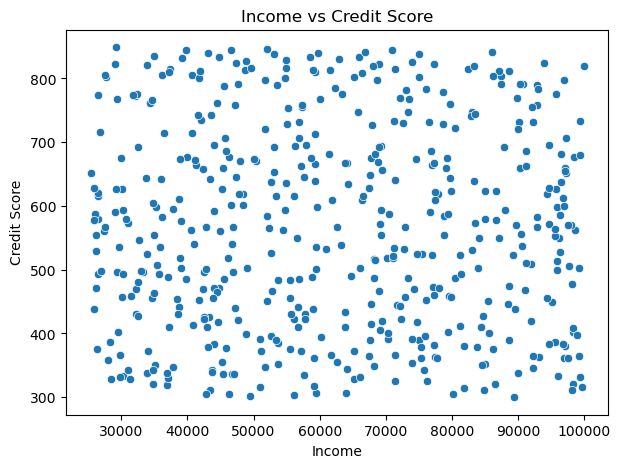

In [41]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Income', y='Credit_Score', data=df)
plt.title("Income vs Credit Score")
plt.xlabel("Income")
plt.ylabel("Credit Score")
plt.show()


**Insights**
Pelanggan dengan pendapatan tinggi tidak selalu memiliki credit score tinggi.Pelanggan dengan pendapatan rendah juga tidak selalu memiliki credit score rendah.

# Clustering Model

In [42]:
from sklearn.preprocessing import StandardScaler
features = df_encoded.copy()

x_unscaled = features.values
scaler = StandardScaler()

x_scaled = scaler.fit_transform(features)

d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

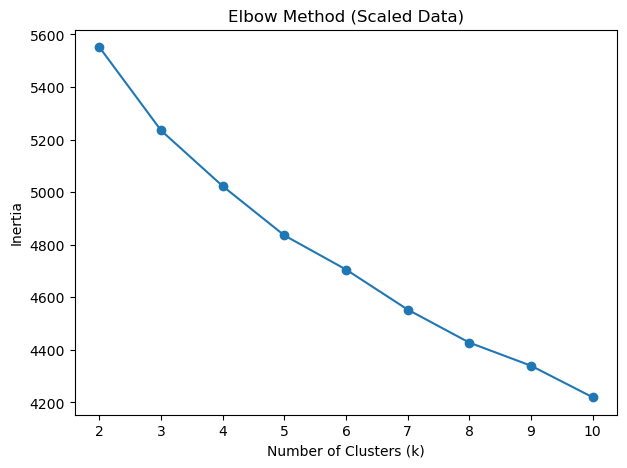

In [43]:
from sklearn.cluster import KMeans
inertia_list = []
K = range(2, 11)

for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(x_scaled)
    inertia_list.append(km.inertia_)

plt.figure(figsize=(7,5))
plt.plot(K, inertia_list, marker='o')
plt.title("Elbow Method (Scaled Data)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()


In [44]:
k = 3
kmeans_unscaled = KMeans(n_clusters=k,random_state=42,n_init=10)
kmeans_scaled = KMeans(n_clusters=k,random_state=42,n_init=10)

clusters_unscaled = kmeans_unscaled.fit_predict(x_unscaled)
clusters_scaled = kmeans_scaled.fit_predict(x_scaled)

df['Cluster_Unscaled'] = clusters_unscaled
df['Cluster_Scaled']   = clusters_scaled

df_encoded['Cluster_Unscaled'] = clusters_unscaled
df_encoded['Cluster_Scaled']   = clusters_scaled


d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [45]:
from sklearn.metrics import silhouette_score
inertia_unscaled = kmeans_unscaled.inertia_
inertia_scaled = kmeans_scaled.inertia_

sil_unscaled = silhouette_score(x_unscaled, clusters_unscaled)
sil_scaled = silhouette_score(x_scaled,clusters_scaled)

print("Inertia (Unscaled) :", inertia_unscaled)
print("Inertia (Scaled)   :", inertia_scaled)
print("Silhouette (Unscaled):", sil_unscaled)
print("Silhouette (Scaled):", sil_scaled)

Inertia (Unscaled) : 135177675268.0356
Inertia (Scaled)   : 5234.611508662241
Silhouette (Unscaled): 0.36227416190914924
Silhouette (Scaled): 0.06874150925480604


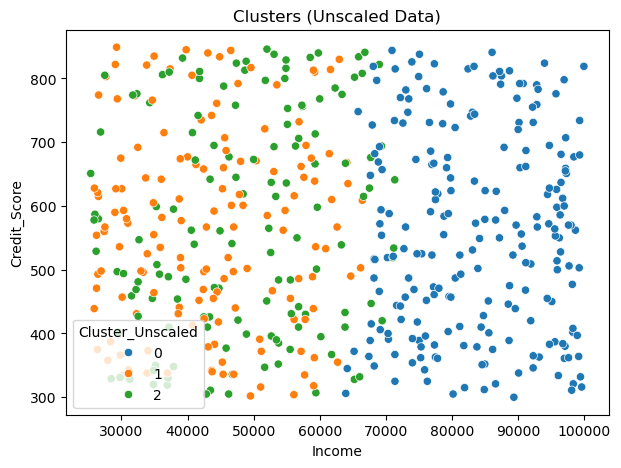

In [46]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x=df['Income'], 
    y=df['Credit_Score'],
    hue=df['Cluster_Unscaled'],
    palette="tab10"
)
plt.title("Clusters (Unscaled Data)")
plt.show()

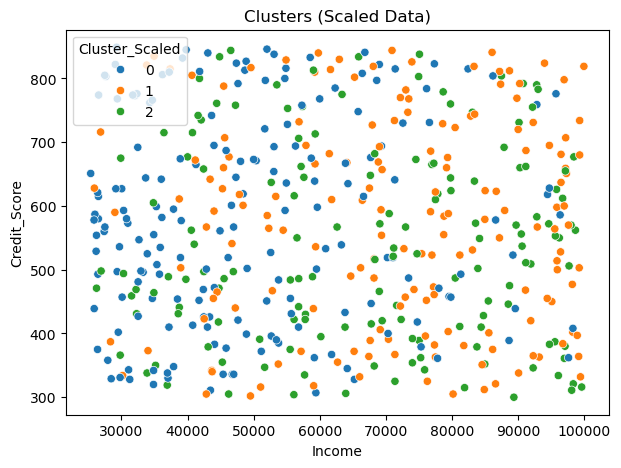

In [47]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x=df['Income'], 
    y=df['Credit_Score'],
    hue=df['Cluster_Scaled'],
    palette="tab10"
)
plt.title("Clusters (Scaled Data)")
plt.show()

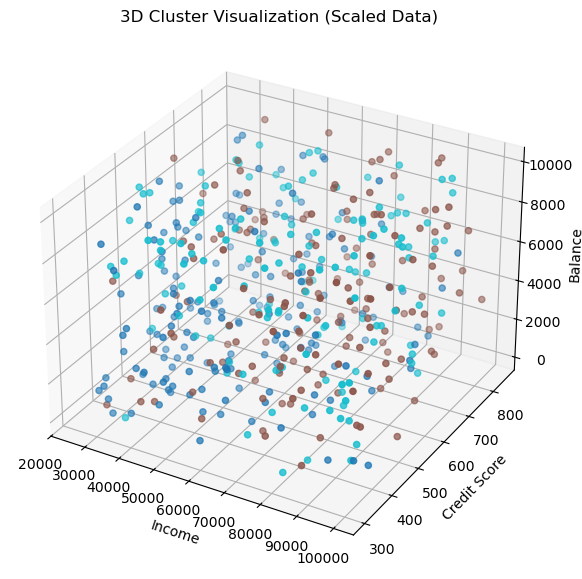

In [48]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    df['Income'],
    df['Credit_Score'],
    df['Balance'],
    c=df['Cluster_Scaled'],
    cmap='tab10'
)

ax.set_xlabel("Income")
ax.set_ylabel("Credit Score")
ax.set_zlabel("Balance")
ax.set_title("3D Cluster Visualization (Scaled Data)")

plt.show()


# Segmentation & Managerial Implication

1. berdasarkan hasil evaluasi silhouete, k_means menunjukkan performa yang berbeda pada data unscaled dan scaled dimana didapatkan : 
- silhoute unscalled : 0.36227416190914924
- silhoute scaled : 0.06874150925480604

nilai silhoute ini menunjukkan jika data unscalled memilikinilai lebih besar daripada yang scaled. menunjukkan jika cluster dengan data scaled lebih terpisah dengan jelas tidak seperti cluster yang scaled yang memiliki banyak overlap dan tidak menunjukkan struktur yang signifikan

Dataset ini berisi banyak fitur finansial dengan rentang besar seperti:
- Income
- Balance
- Credit Card Limit
- Loan Approval Amount

Fitur tersebut secara alami memiliki variasi tinggi dan memainkan peran besar dalam pembedaan antar-segmen nasabah. ketika dilakukan scaling semua fitur dipaksa menjadi sama, Informasi dominan dari fitur finansial hilang dan informasi mengenai education atau purchase frequency menjadi tidak proporsional
Akibatnya pola alami cluster menjadi rusak, sehingga silhouette score turun drasti

In [49]:
cluster_summary = df_encoded.groupby('Cluster_Unscaled').agg(['mean', 'median', 'min', 'max'])
cluster_summary

Income                                         \
                          mean       median          min          max   
Cluster_Unscaled                                                        
0                 83605.930546  83539.68822  63912.63616  99913.52549   
1                 43597.836529  43643.74782  25878.55631  66414.43524   
2                 48351.443112  48657.12632  25352.16071  71322.66228   

                        Age                Education         ...  \
                       mean median min max      mean median  ...   
Cluster_Unscaled                                             ...   
0                 40.152074   40.0  18  64  1.400922    1.0  ...   
1                 40.608108   40.0  18  63  1.358108    1.0  ...   
2                 39.125926   37.0  18  64  1.459259    1.0  ...   

                 Customer_Satisfaction     Online_Activity            \
                                   min max            mean    median   
Cluster_Unscaled                                                       
0                                    1   4        0.463503  0.406844   
1                                    1   4        0.509224  0.538747   
2                                    1   4        0.528244  0.519799   

                                     Cluster_Scaled                 
                       min       max           mean median min max  
Cluster_Unscaled                                                    
0                 0.001320  0.996199       1.230415    1.0   0   2  
1                 0.001432  0.999897       0.797297    1.0   0   2  
2                 0.007766  0.999120       0.592593    0.0   0   2  

[3 rows x 52 columns]

2. karateristik tiap cluster : 

 - cluster 0 : kelompok dengan pendapatan terbesar dengan rata" income mereka 83K. mereka juga berpendidikan dengan mayoritas dari mereka memiliki gelar bachelor - master, rata" online activity juga yang paling tinggi. sangat berkemungkinan untuk menjadi enjadi premium customers / nasabah bernilai tinggi

 - cluster 1 : kelompok pendapatan paling rendah dengan rata" sekitar 43K. gelar pendidikan mereka juga cukup tinggi sekitar bachelor - master. relatif puas dengan layanan bank. Nasabah ini cocok diberi program peningkatan limit bertahap, kredit kecil, atau produk entry-level dengan potensi meningkatkan loyalitas.

 - cluster 2 : kelompok dengna pendapatan sedikit diatas cluster 1 sekitar 48K,berpendidikan tinggi, aktif secara digital, dan sangat puas dengan layanan. Ini segmen penting untuk investasi jangka panjang karena loyalitasnya tinggi.

3.Cluster 0 – High-Income & Digitally Active
Fokuskan pada produk premium (kartu kredit high-limit, wealth management), layanan prioritas, dan promosi melalui aplikasi karena mereka sangat aktif secara digital.

Cluster 1 – Low-Income but Satisfied
Tawarkan produk entry-level seperti micro-loan dan kartu kredit limit rendah. Berikan edukasi finansial dan reward kecil untuk menjaga kepuasan dan meningkatkan aktivitas.

Cluster 2 – Young, Educated & Highly Satisfied
Promosikan produk digital (e-wallet, mobile investment) serta program loyalitas gaya hidup. Segmen ini cocok untuk pengembangan jangka panjang karena puas dan berpendidikan tinggi.